<a href="https://colab.research.google.com/github/SonwabileBanca/SonwabileBanca.github.io/blob/main/Flight001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sonwabile Banca**

**Project: Multivariate Time Series**

**NASA Flight001**

Multivariate Time-Series (MTS) are ubiquitous, and are generated in areas as disparate as sensor recordings in aerospace systems, music and video streams, medical monitoring, and financial systems. Domain experts are often interested in searching for interesting multivariate patterns from these MTS databases which can contain up to several gigabytes of data



In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns

In [5]:
import os
for dirname, _, filenames in os.walk('sample_data/Flight001.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [10]:
path = 'sample_data/Flight001.csv'

df = pd.read_csv(path)

df.head(30)

,time,alt,MN,TRA,Wf,Fn,SmHPC,SmLPC,SmFan,T48,...,phi,Ps30,NfR,NcR,BPR,farB,htBleed,PCNfRdmd,W31,W32
0,0.000,0.0,0.000000,0.0000,1.3799,18073,36.564,7.5386,5.1091,1283.6,...,28.903,171.88,1258.3,7449.6,9.4495,0.013078,282.29,48.000,16.487,9.8924
1,1.005,0.0,0.004546,1.8182,1.3804,17848,36.556,7.5393,5.1151,1283.7,...,28.909,171.90,1258.3,7449.6,9.4512,0.013081,282.30,49.345,16.488,9.8928
2,2.010,0.0,0.009114,3.6455,1.3805,17630,36.556,7.5396,5.1252,1283.7,...,28.908,171.91,1258.3,7449.6,9.4550,0.013081,282.30,50.696,16.490,9.8938
3,3.015,0.0,0.013682,5.4727,1.3809,17416,36.554,7.5394,5.1384,1283.8,...,28.915,171.93,1258.3,7449.6,9.4600,0.013084,282.30,52.048,16.491,9.8949
4,4.020,0.0,0.018250,7.3000,1.4652,17695,35.451,7.7880,5.2477,1310.4,...,29.866,176.61,1269.2,7465.1,9.3931,0.013670,284.21,53.400,16.748,10.0490
5,5.025,0.0,0.022818,9.1273,1.5492,18680,34.898,7.9885,5.4826,1332.0,...,30.412,183.38,1299.0,7489.4,9.4255,0.014042,287.18,54.751,17.239,10.3430
6,6.030,0.0,0.027386,10.9550,1.6294,19732,34.451,8.0741,5.7387,1351.5,...,30.893,189.88,1330.7,7511.1,9.4775,0.014373,289.97,56.094,17.714,10.6280
7,7.035,0.0,0.031955,12.7820,1.7113,20775,34.013,8.1446,6.1120,1370.8,...,31.368,196.40,1362.4,7532.2,9.5186,0.014702,292.72,57.428,18.188,10.9130
8,8.040,0.0,0.036523,14.6090,1.7972,21811,33.554,8.2179,6.4567,1390.6,...,31.859,203.08,1393.8,7553.3,9.5465,0.015044,295.48,58.763,18.666,11.2000
9,9.045,0.0,0.041091,16.4360,1.8853,22850,33.117,8.2926,6.7680,1410.1,...,32.333,209.91,1425.5,7574.4,9.5629,0.015379,298.24,60.098,19.154,11.4930


In [13]:
df.set_index('time', inplace=True)
df.head()

,alt,MN,TRA,Wf,Fn,SmHPC,SmLPC,SmFan,T48,T2,...,phi,Ps30,NfR,NcR,BPR,farB,htBleed,PCNfRdmd,W31,W32
time,,,,,,,,,,,,,,,,,,,,,
0.000,0.0,0.000000,0.0000,1.3799,18073,36.564,7.5386,5.1091,1283.6,518.67,...,28.903,171.88,1258.3,7449.6,9.4495,0.013078,282.29,48.000,16.487,9.8924
1.005,0.0,0.004546,1.8182,1.3804,17848,36.556,7.5393,5.1151,1283.7,518.67,...,28.909,171.90,1258.3,7449.6,9.4512,0.013081,282.30,49.345,16.488,9.8928
2.010,0.0,0.009114,3.6455,1.3805,17630,36.556,7.5396,5.1252,1283.7,518.68,...,28.908,171.91,1258.3,7449.6,9.4550,0.013081,282.30,50.696,16.490,9.8938
3.015,0.0,0.013682,5.4727,1.3809,17416,36.554,7.5394,5.1384,1283.8,518.69,...,28.915,171.93,1258.3,7449.6,9.4600,0.013084,282.30,52.048,16.491,9.8949
4.020,0.0,0.018250,7.3000,1.4652,17695,35.451,7.7880,5.2477,1310.4,518.70,...,29.866,176.61,1269.2,7465.1,9.3931,0.013670,284.21,53.400,16.748,10.0490


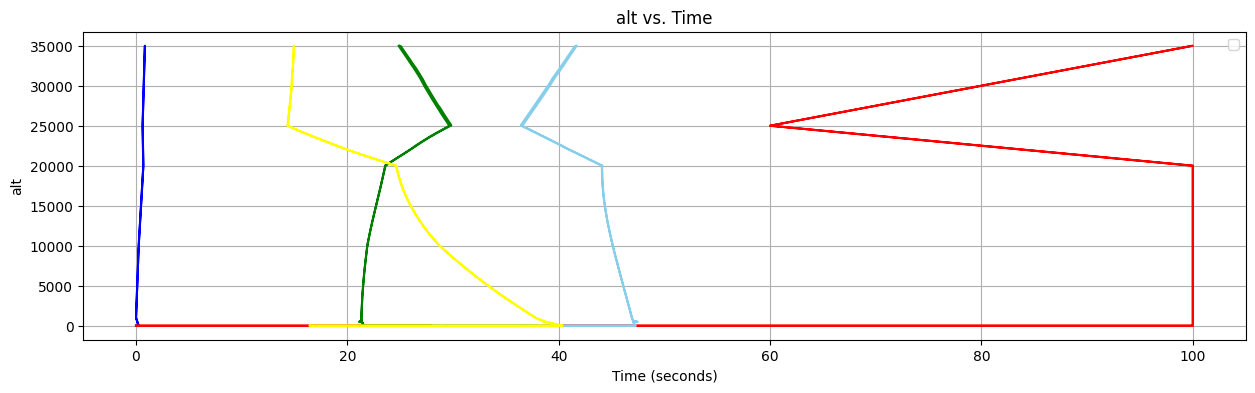

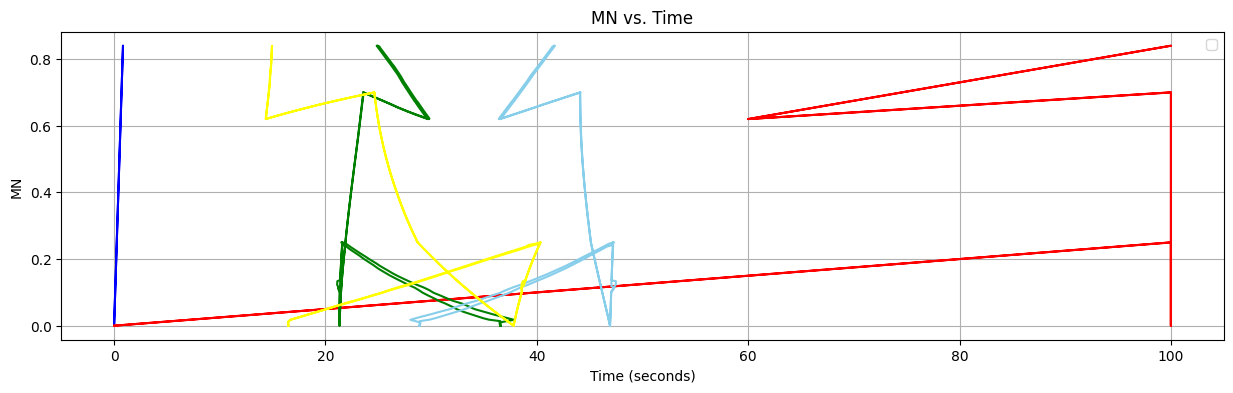

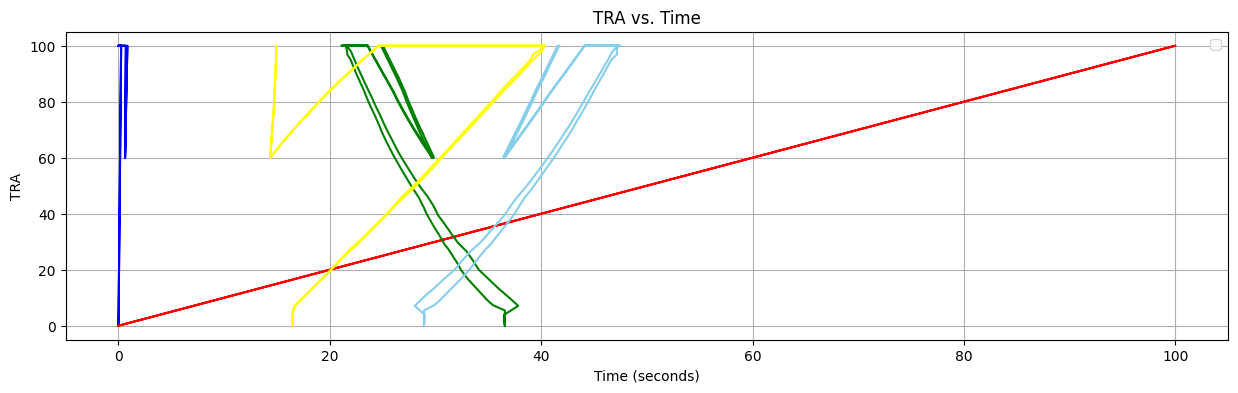

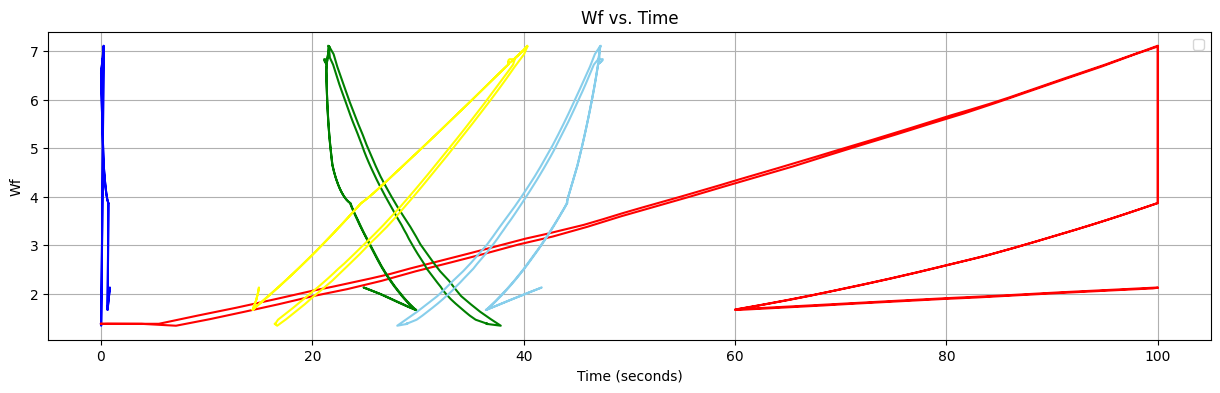

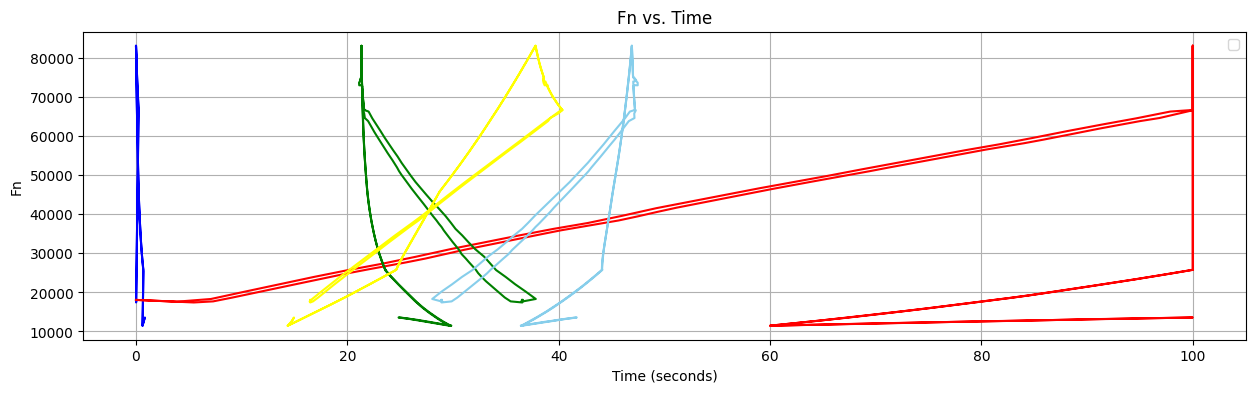

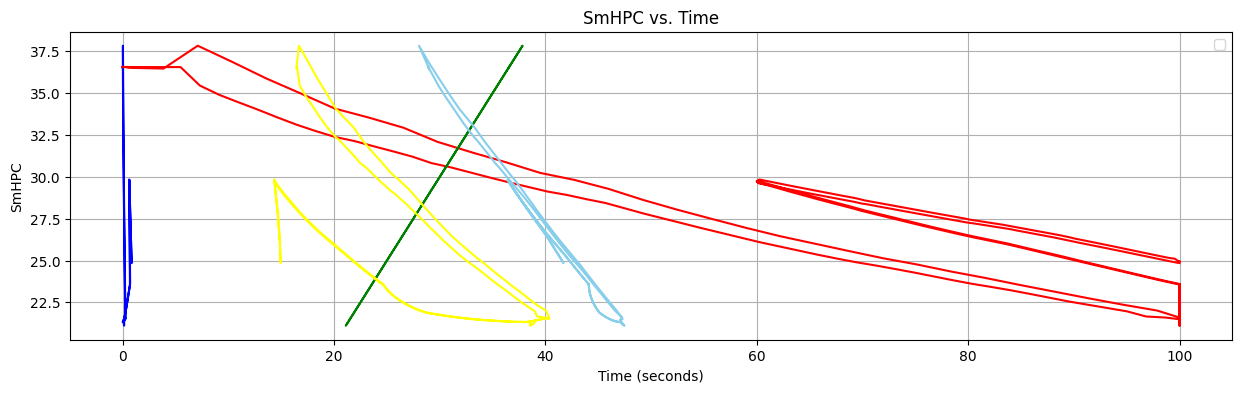

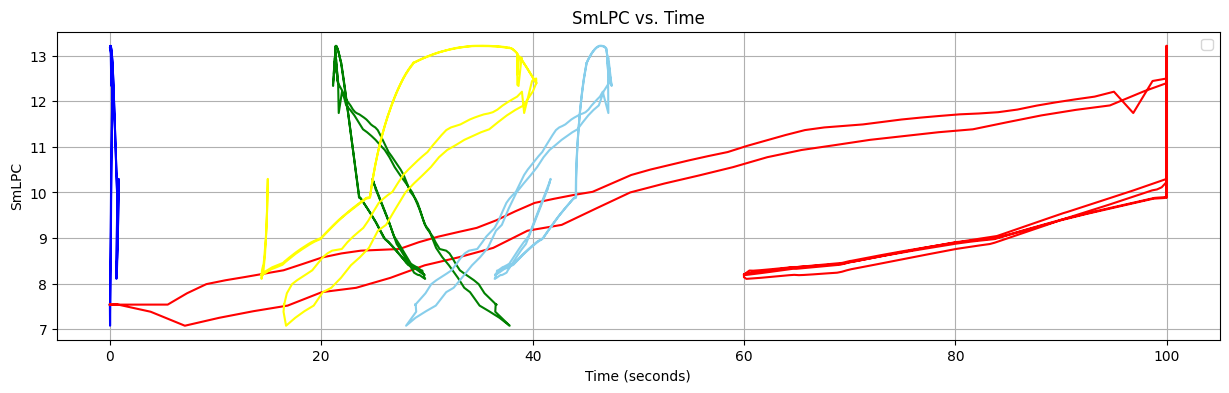

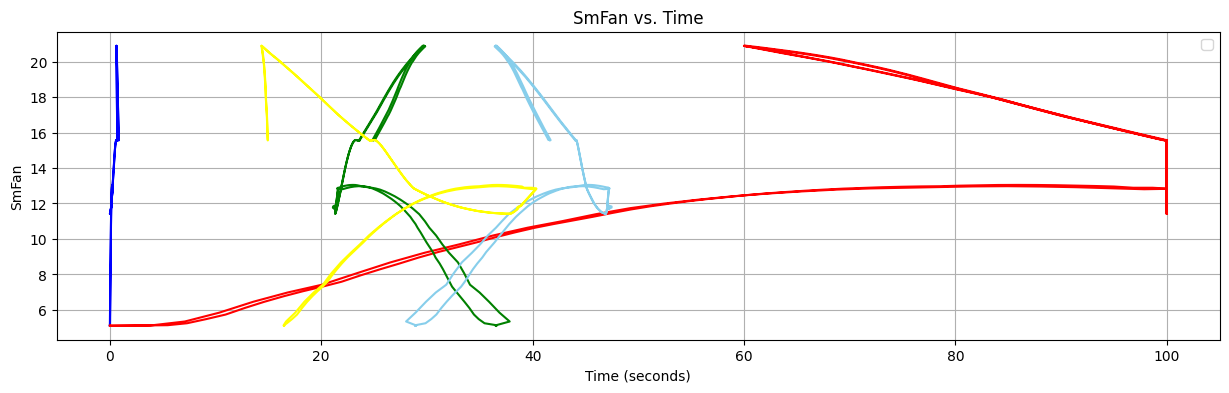

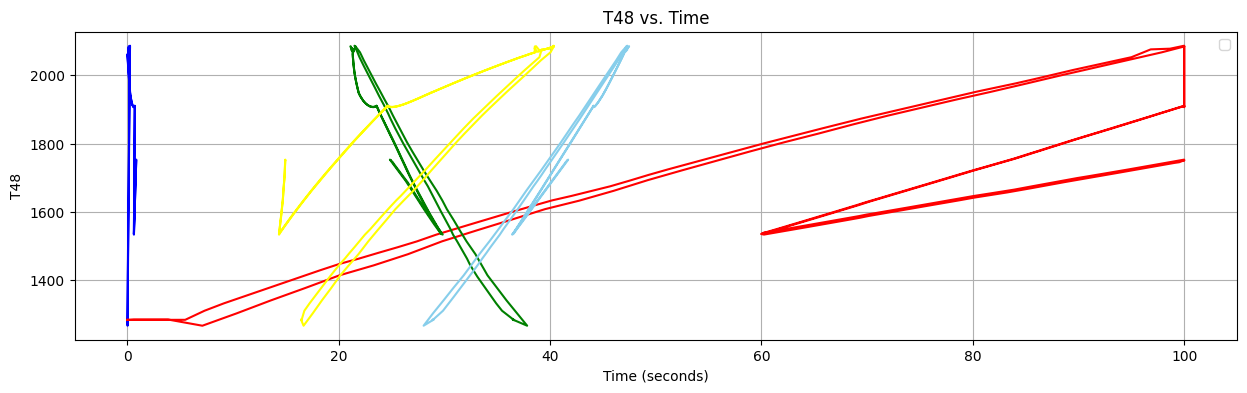

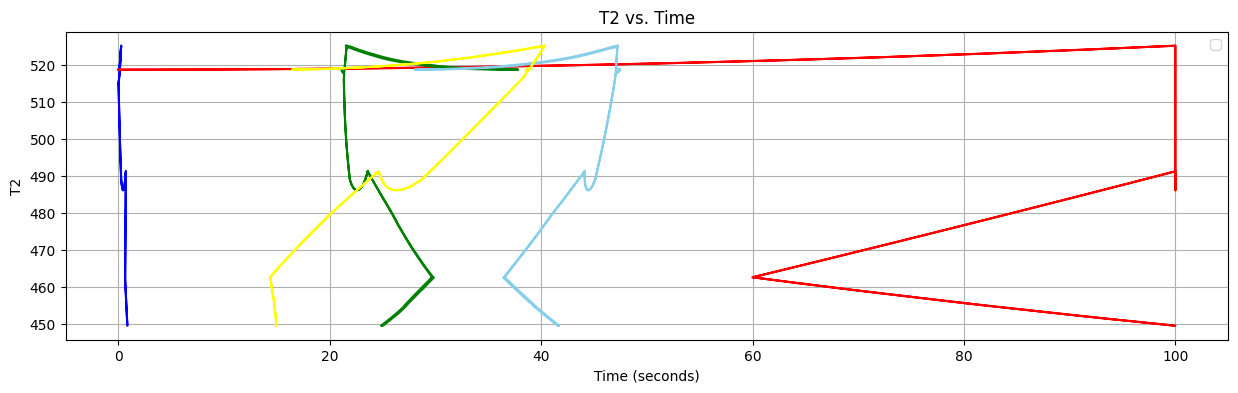

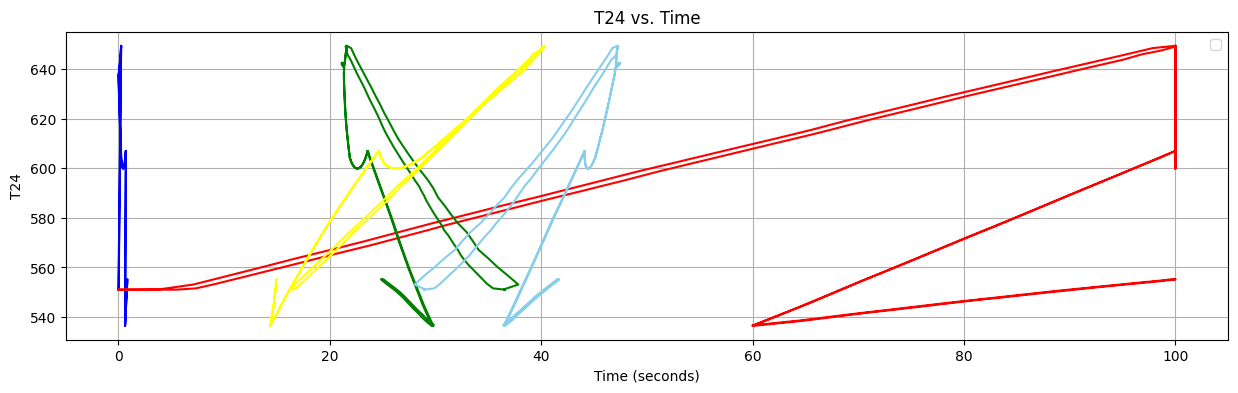

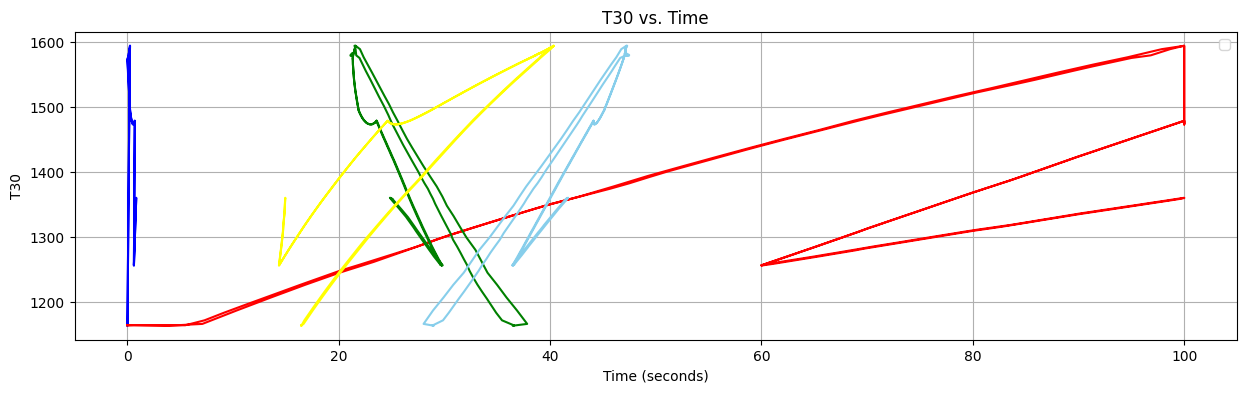

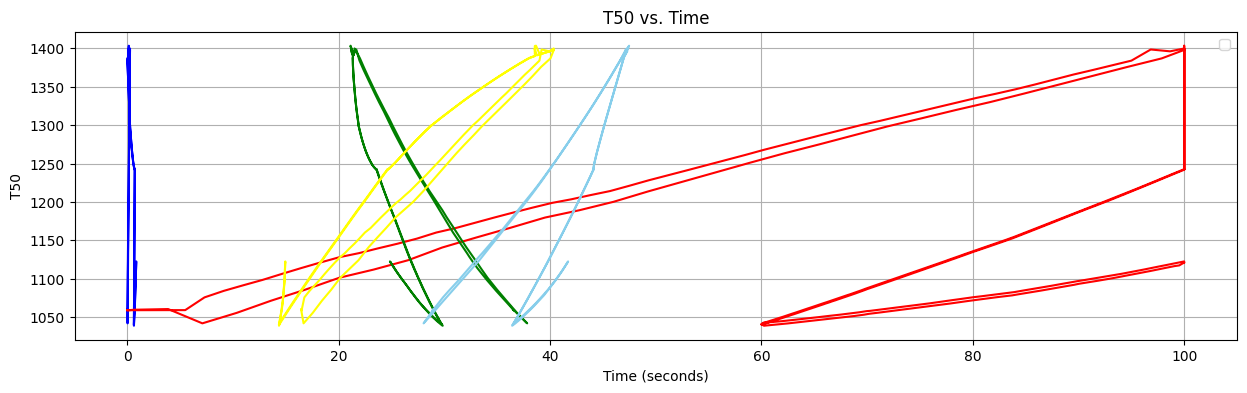

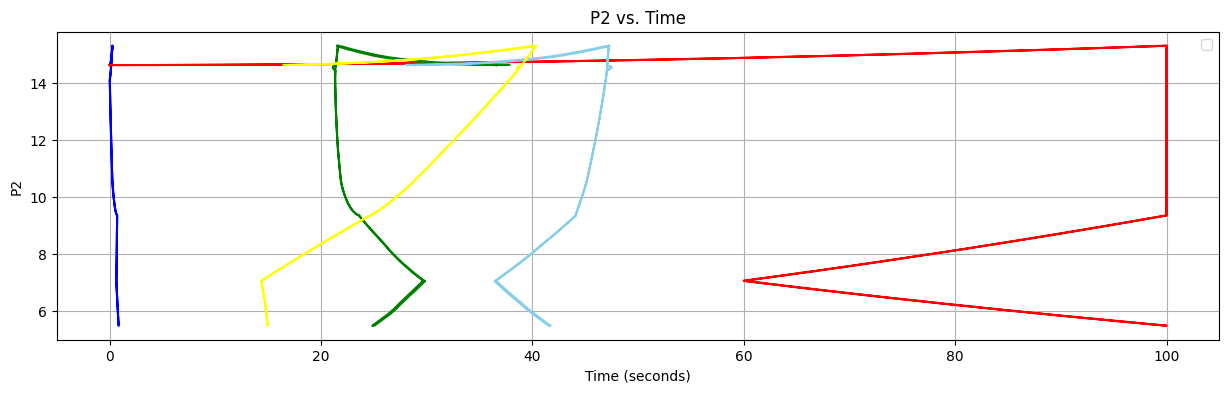

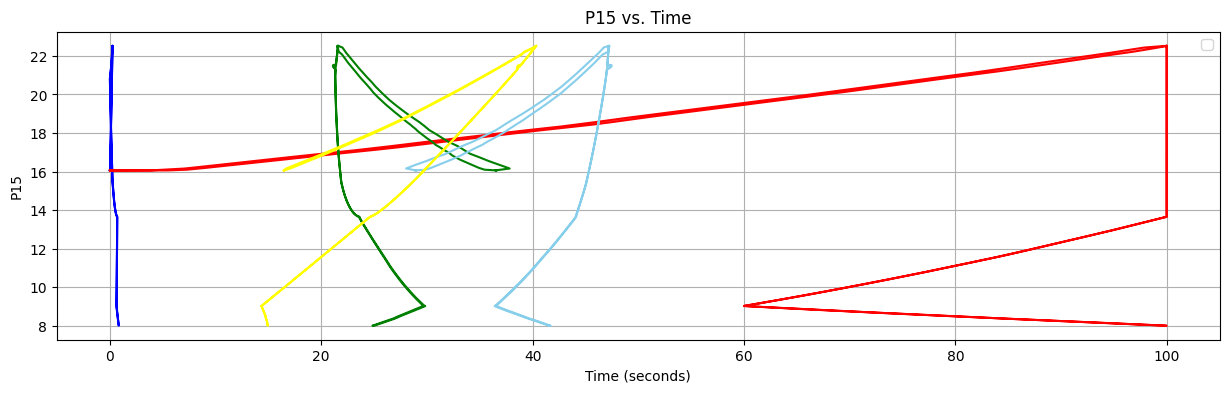

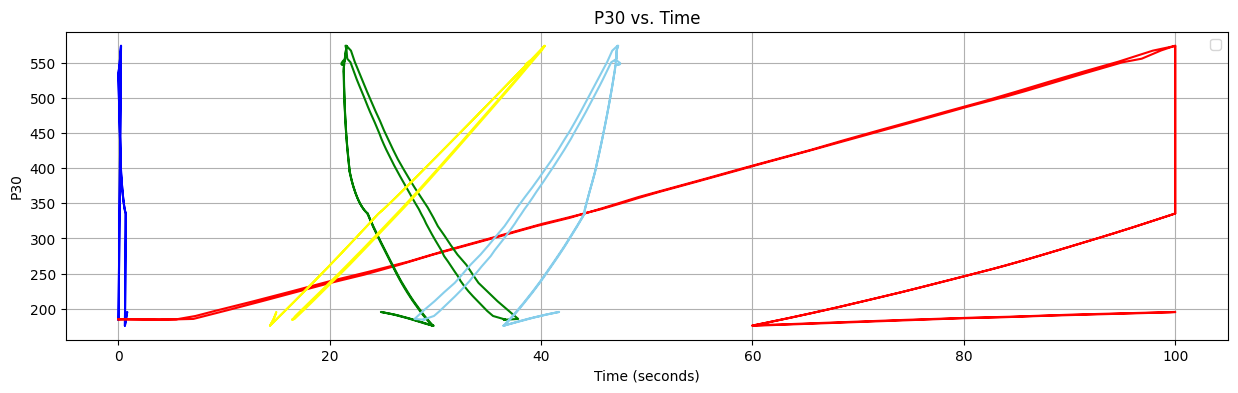

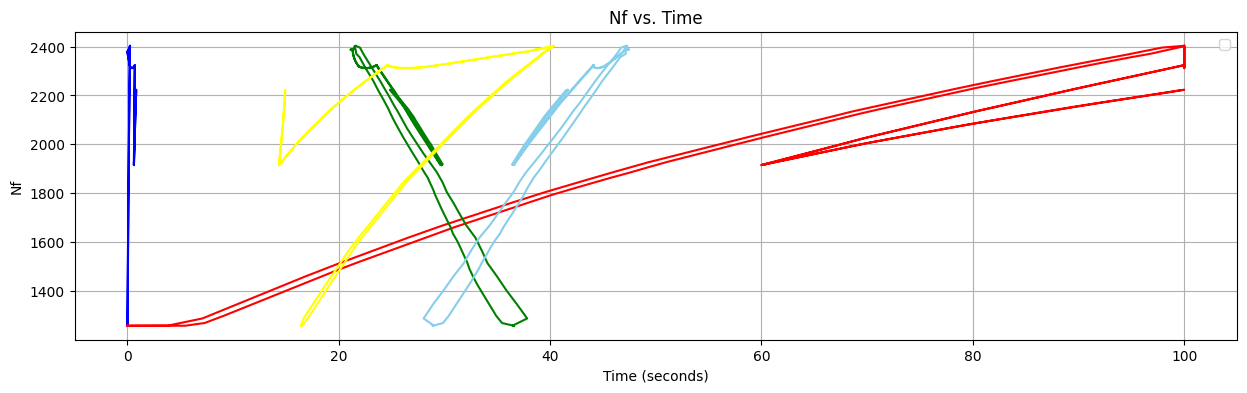

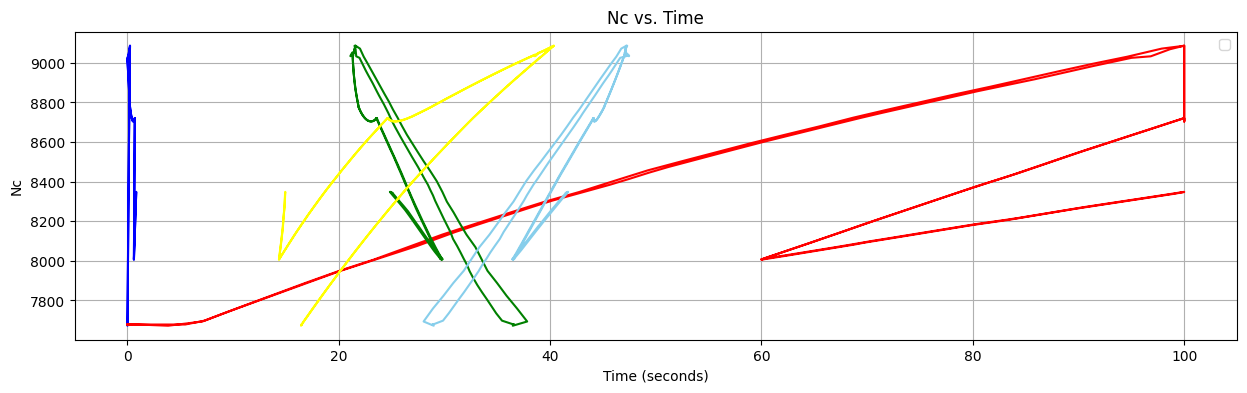

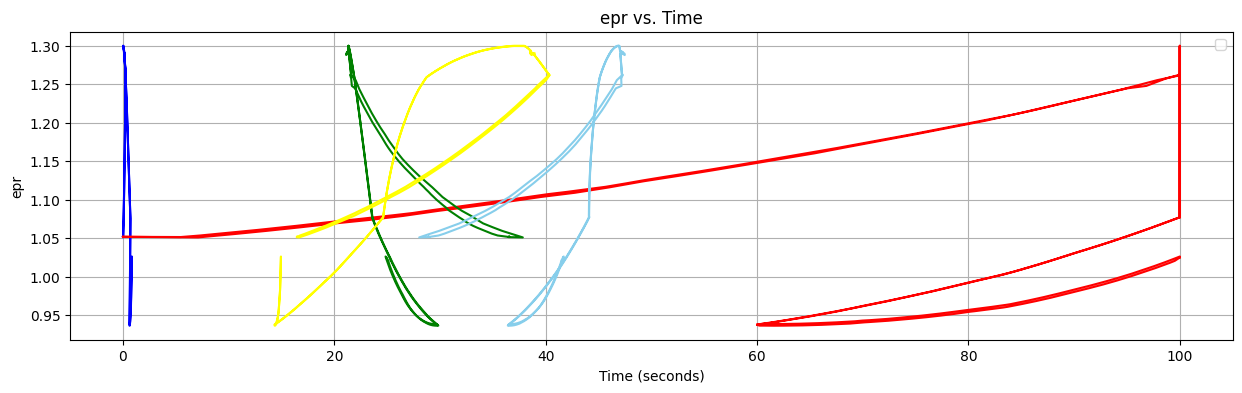

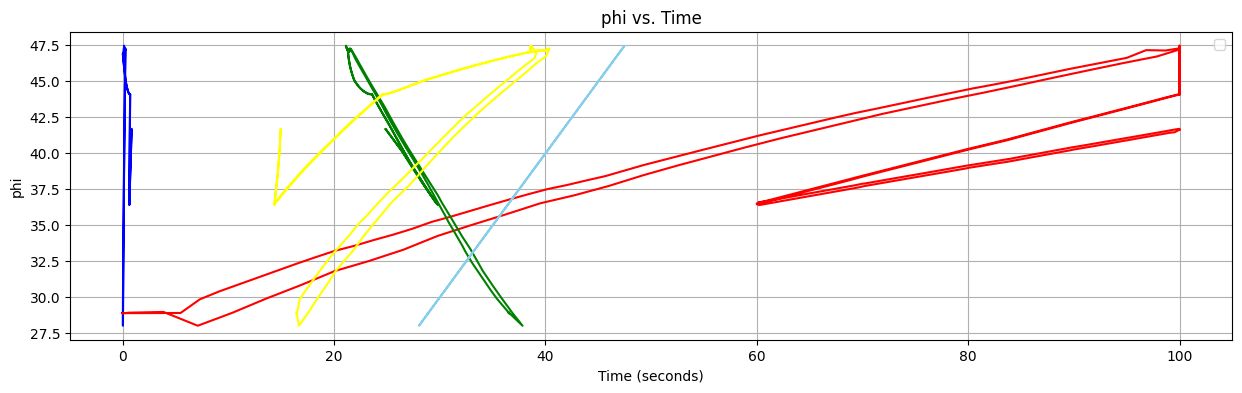

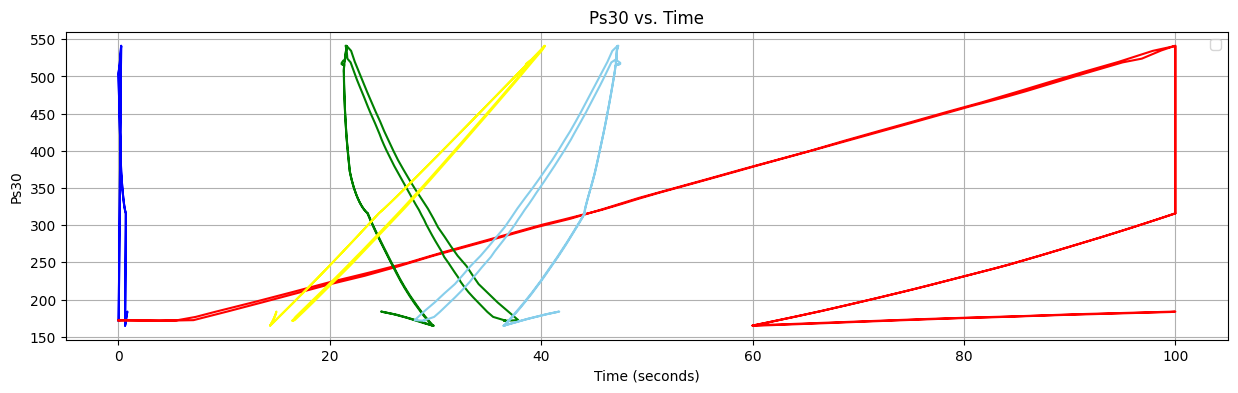

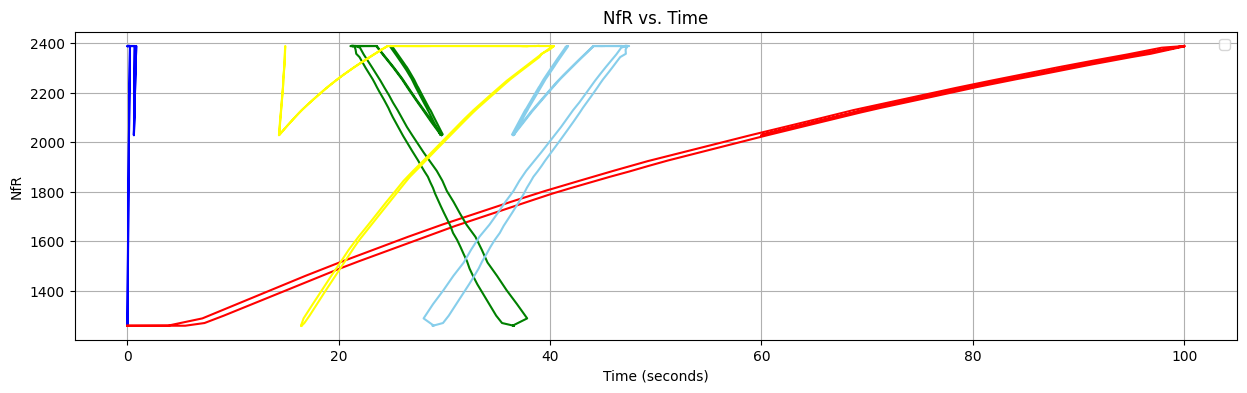

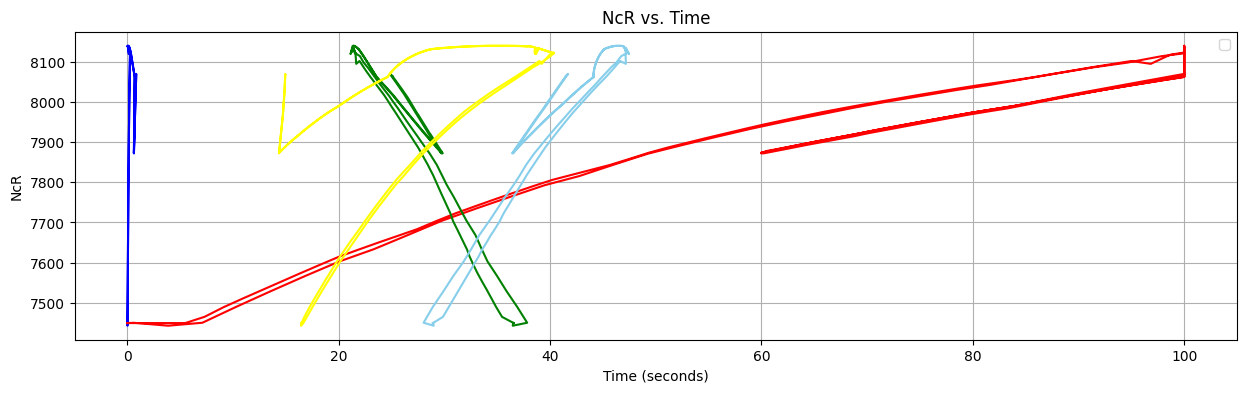

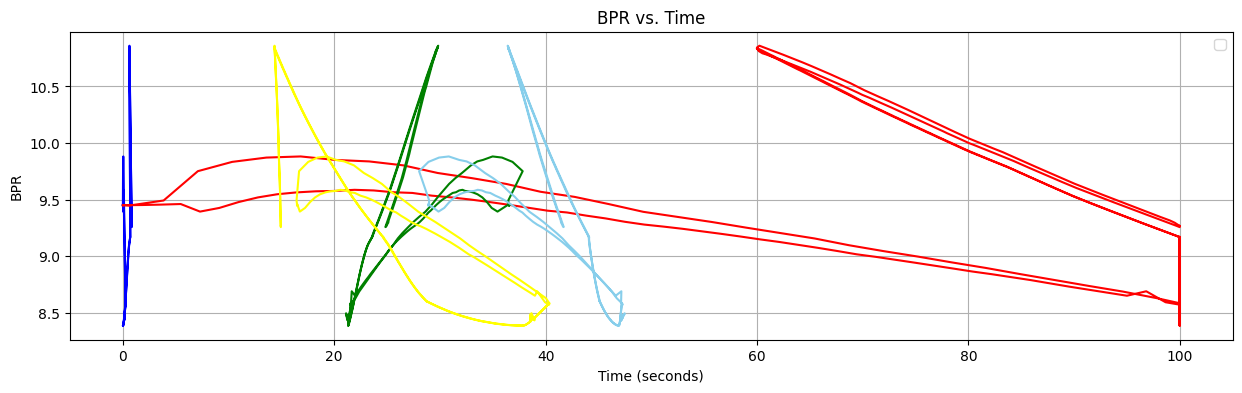

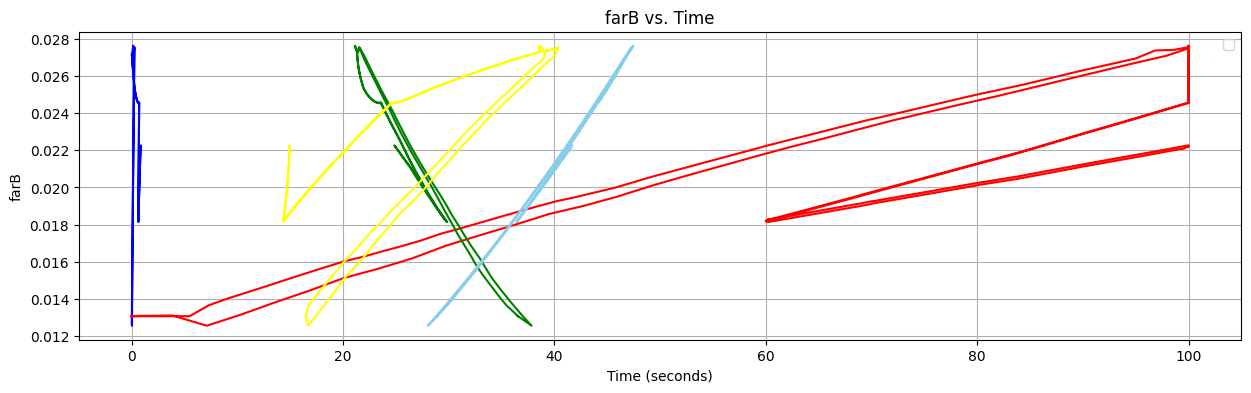

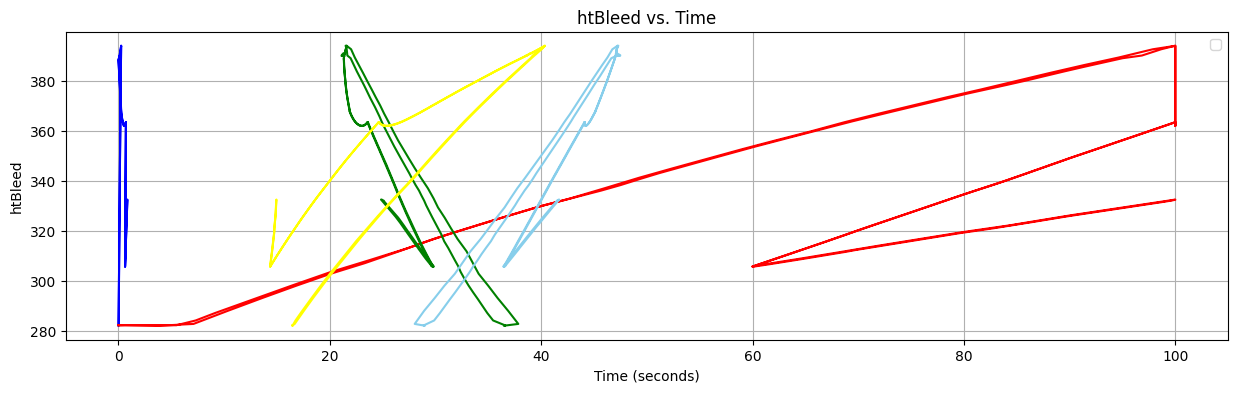

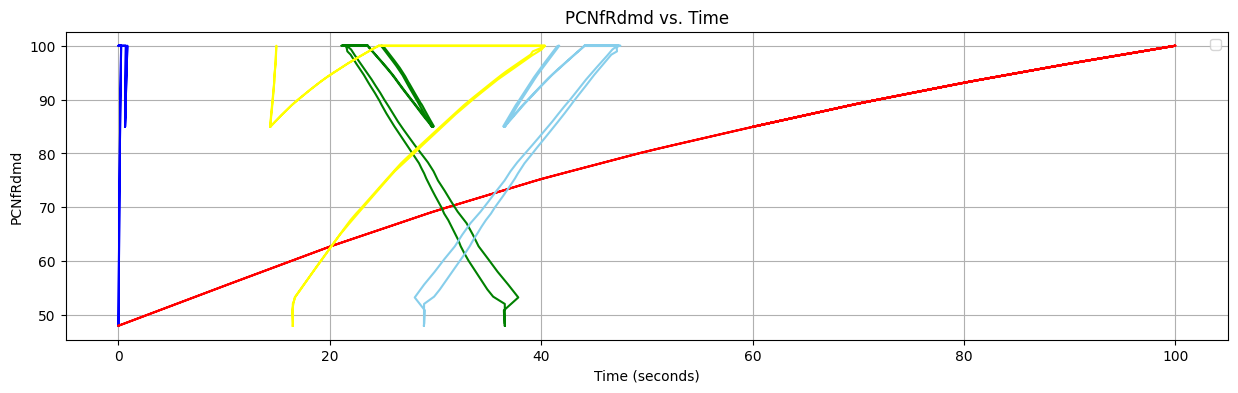

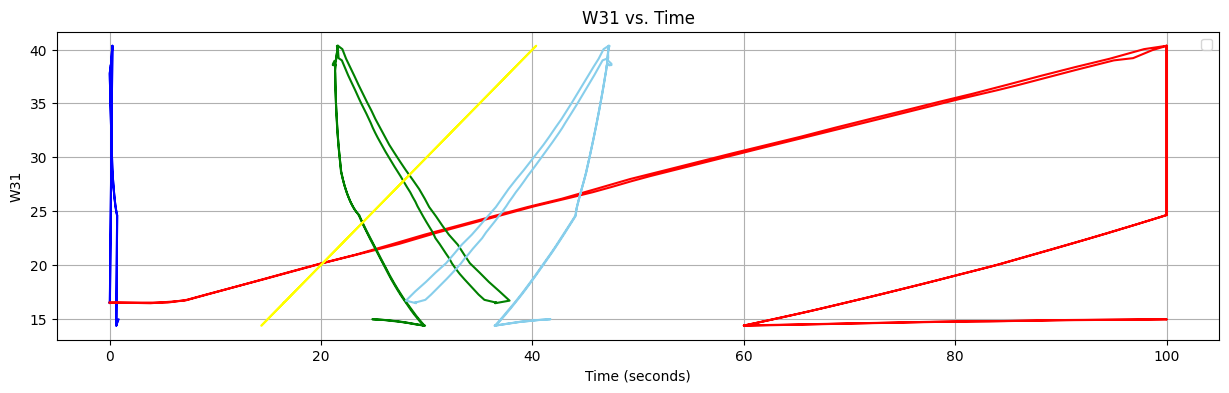

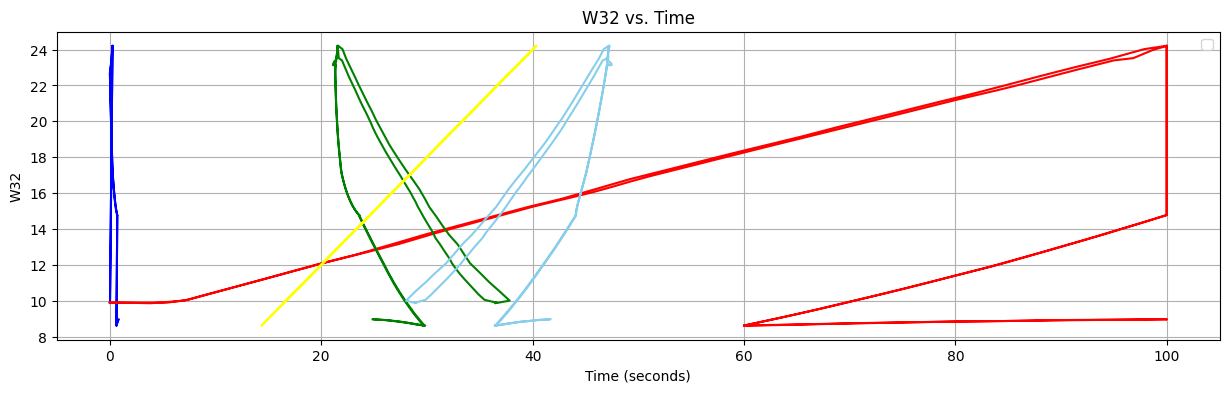

In [18]:
for col in df.columns:
    if col != 'time_seconds':  # Skip the column representing time
        plt.figure(figsize=(15, 4))
        plt.plot(df['MN'], df[col], color='blue')
        plt.plot(df['TRA'], df[col], color='red')
        plt.plot(df['SmHPC'], df[col], color='green')
        plt.plot(df['phi'], df[col], color='skyblue')
        plt.plot(df['W31'], df[col], color='yellow')
        plt.title(f'{col} vs. Time')
        plt.xlabel('Time (seconds)')
        plt.legend()
        plt.ylabel(col)
        plt.grid(True)
        plt.show()